# Принадлежность точки не выпоклому многоугольнику

##  Задача

Задан многоугольник и точка. Требуется определить, находится ли заданная точка внутри этого многоугольника.


##  Разминка

Предлагается взглянуть на картинку, на которой изображен многоугольник типа [кривой Пеано](https://ru.wikipedia.org/wiki/Кривая_Пеано), и попытаться ответить на вопрос $-$ красная точка находится внутри или снаружи многоугольника?
<p align="center">
<img src="images/peano.png" width="350"/>
</p>

## Описание алгоритма

**Идея:**
   Провести луч из точки и посчитать количество его пересечений с ребрами многоугольника. 

**Проблема:**
   Луч может пройти через вершину многоугольника. Такой случай надо описать отдельно. Для этого давайте считать, что ребро $-$ интервал между вершинами, а правая вершина та, у которой координата $x$ больше. 

<p align="center">
<img src="images/out_line.png" width="300"/>
</p>

## Алгоритм

* Мысленно проведем вертикальный луч из данной точки.
* Посчитаем количество пересечений с ребрами многоугольника. 
    Переберем все ребра ($P_1$,$P_2$) по таким правилам $P_{1x}$ $<$ $P_{2x}$: 
    * если точка $А$ лежит на ребре, то точка лежит в многоугольнике;
    * если у ребра $P_{1x}$ $=$ $P_{2x}$, то это будет вертикальное ребро, оно не влияет на           четность, пропускаем его;
    * если у ребра $A_x$ $=$ $P_{2x}$ и $P_{2y}$ $>$ $A_y$, то увеличим счетчик на $1$;
    * если у ребра $A_x$ $=$ $P_{1x}$, то пропускаем данное ребро;
    * если $P_{1x}$ $<$ $A_x$ $<$ $P_{2x}$ или $P_{2x}$ $<$ $A_x$ $<$ $P_{1x}$ и поворот точек $(P_1,P_2,A)$ левый, то увеличиваем счетчик пересечений на $1$;
    
* Если количество пересечений четно, то точка лежит вне многоугольника, иначе внутри.

## Время работы
На каждое ребро тратится $O\left(1\right)$ времени, при этом мы проходимся по всем ребрам, чтобы проверить, пересекает ли наш луч данное ребро. Тогда алгоритм работает за $O(n)$, где $n$ &ndash; количество вершин (и ребер) многоугольника.

## Память

Храним список вершин многоугольника, искомую вершину и $O\left(1\right)$ памяти для хранения луча, следовательно, требуемая память &ndash; $O\left(n\right)$


## Упражнения

In [1]:
import solutions

## Упражнение 0

* Задача:
    * написать функцию, которая определяет поворот точки относительно прямой, образованной двумя точками
* Формат входных данных:
    * $points$ &ndash; массив с вершинами, задающими прямую.
    * вершина задается следующим образом: $[x,y]$, где $x$ и $y$ &ndash; координаты вершины
    * $p$ &ndash; точка, поворот которой надо проверить
* Формат выходных данных:
    * $1$ &ndash; слева
    * $-1$ &ndash; справа
    * $0$ &ndash; лежит на прямой

In [2]:
def turn(points, p):
    # insert your code here...                   
    return 1

turn = solutions.turn

Проверим корректность решения:

* $solutions.test$_$orientation$ тестирует функцию $orientation$
* $solutions.show$_$example$ показывает, что выдает написанный алгоритм на статических тестах, поданных на вход

In [3]:
solutions.test_turn(turn)

passed 50 tests
passed 100 tests
passed 150 tests
All tests passed


## Упражнение 1

* Задача:
    * написать функцию, которая определяет, пересекается ли луч с отрезком
    * можно пользоваться поворотом, который уже написан ($solutions.orientation$)
* Формат входных данных:
    * $ray$ &ndash; начальная точка, любая точка на луче
    * $segment$ &ndash; начальная точка, конечная точка
* Формат выходных данных:
    * $True$ &ndash; луч пересекается с отрезком
    * $False$ &ndash; иначе

In [4]:
def intersect(ray, segment):
    # insert your code here...                   
    return False

intersect = solutions.intersect

Проверим корректность решения:

* $solutions.test$_$intersect$ тестирует функцию $intersect$
* $solutions.show$_$examples$ показывает, что выдает написанный алгоритм на статических тестах, поданных на вход

In [5]:
solutions.test_intersect(intersect)

passed 50 tests
passed 100 tests
passed 150 tests
All tests passed


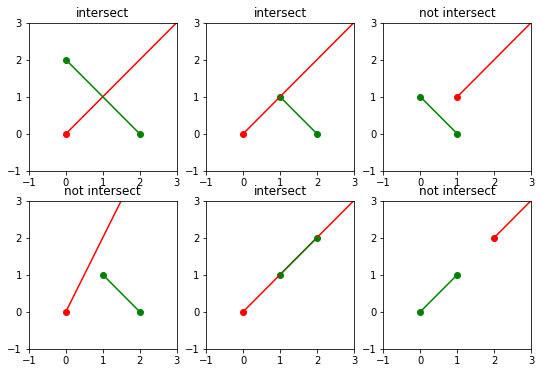

In [6]:
tests = [[[0, 0], [4, 4], [2, 0], [0, 2]],
         [[0, 0], [4, 4], [2, 0], [1, 1]],
         [[1, 1], [4, 4], [1, 0], [0, 1]],
         [[0, 0], [2, 4], [2, 0], [1, 1]],
         [[0, 0], [4, 4], [1, 1], [2, 2]],
         [[2, 2], [4, 4], [0, 0], [1, 1]]]

solutions.show_examples(tests, intersect)

# Упражнение 2

* Задача:
    * написать функцию проверки принадлежности точки невыпуклому многоугольнику
    * можно пользоваться поворотом, который уже написан ($solutions.orientation$)
* Формат входных данных:
    * $points$ &ndash; массив с вершинами многоугольника.
    * вершина задается следующим образом: $[x,y]$, где $x$ и $y$ &ndash; координаты вершины
    * $point$ &ndash; точка, принадлежность которой надо проверить
* Формат выходных данных:
    * $True$ $-$ точка внутри многоугольника
    * $False$ $-$ точка снаружи или на границе многоугольника

In [7]:
def check(points, point): 
   # insert your code here...                   
    return False


check = solutions.check

Проверим корректность решения:

* $solutions.test$ тестирует функцию $check$
* тест с неправильным результатом будет изображен на картинке
* $solutions.show$_$test$ показывает, что выдает написанный алгоритм на статических тестах, поданных на вход

In [8]:
solutions.test(check)

passed 50 tests
passed 100 tests
passed 150 tests
All tests passed


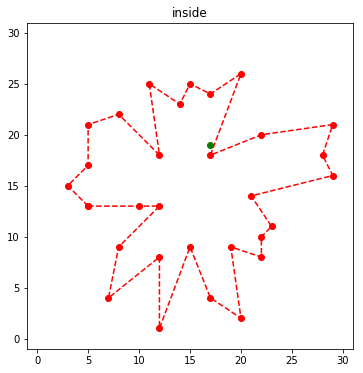

In [9]:
test=[[(5, 13), (10, 13), (12, 13), (8, 9), (7, 4), (12, 8), (12, 1), (15, 9), (17, 4), (20, 2), (19, 9), (22, 8), (22, 10), (23, 11), (21, 14), (29, 16), (28, 18), (29, 21), (22, 20), (17, 18), (20, 26), (17, 24), (15, 25), (14, 23), (11, 25), (12, 18), (8, 22), (5, 21), (5, 17), (3, 15)],
     [17, 19]]

solutions.show_test(test,check)